In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

# Load dataset

In [3]:
X_flares = pd.read_csv('../fulldata/X_train.csv', header = None)
y_flares = pd.read_csv('../fulldata/y_train.csv')

In [6]:
y_flares

,log_intensity,category
0,-14.450389,B
1,-13.720200,C
2,-13.073573,C
3,-12.652360,C
4,-14.614018,B
...,...,...
8161,-12.092744,C
8162,-11.841430,C
8163,-11.943708,C
8164,-13.978029,B


### Plot the histogram of log intensity

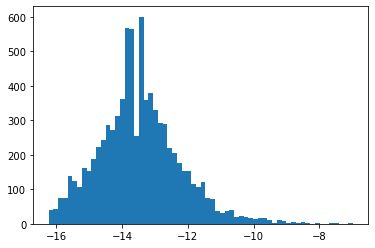

In [16]:
plt.hist(y_flares['log_intensity'], bins='auto') 
plt.show()

### Plot the marginal of covariate

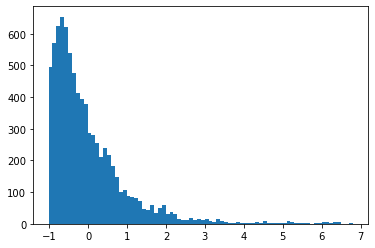

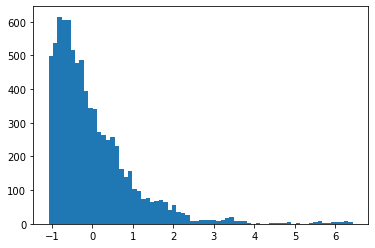

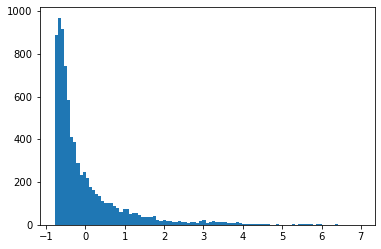

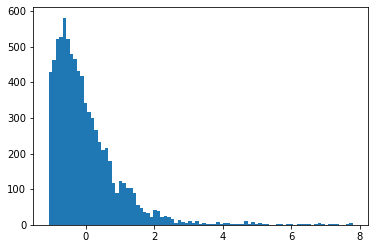

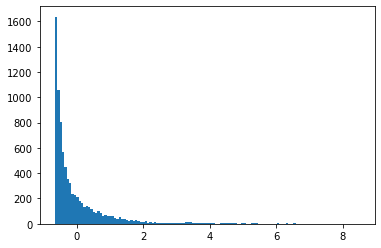

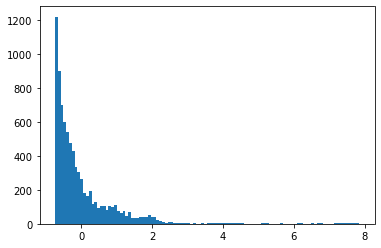

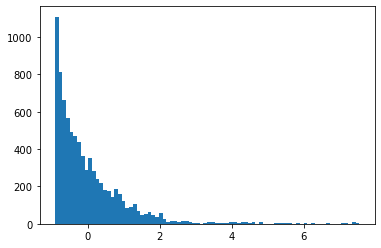

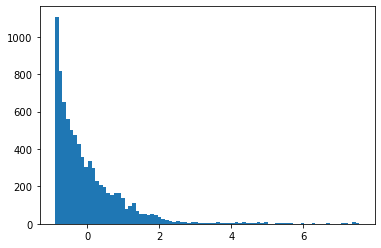

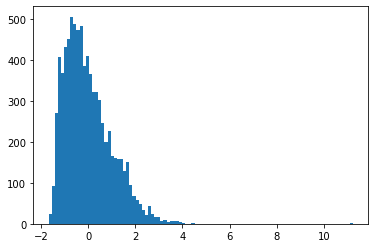

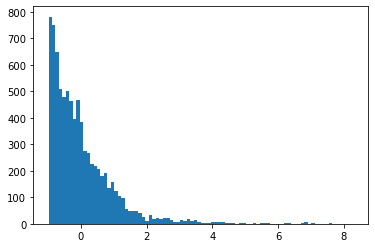

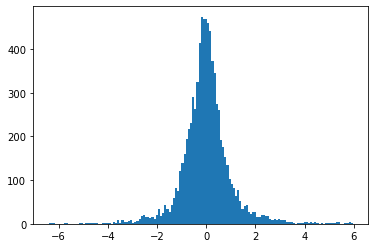

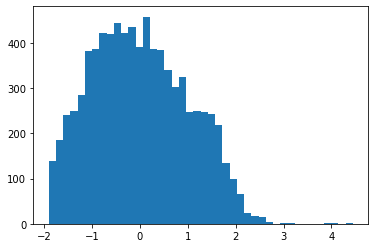

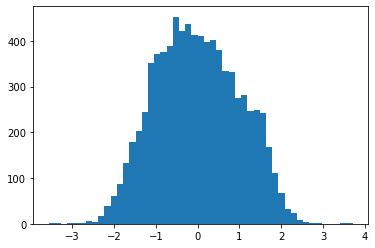

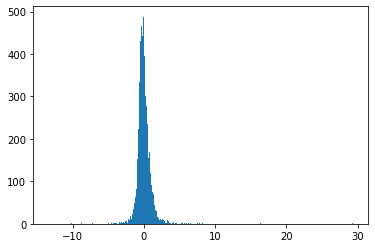

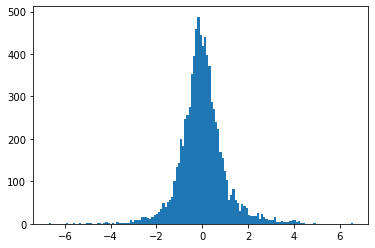

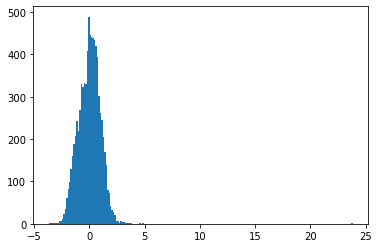

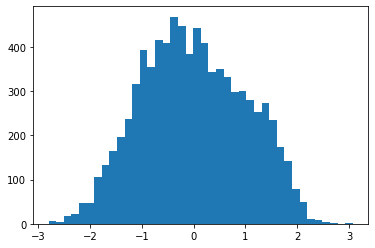

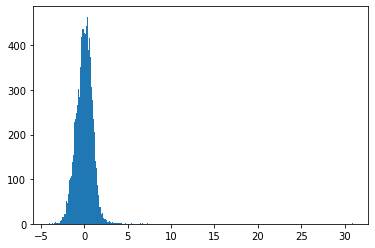

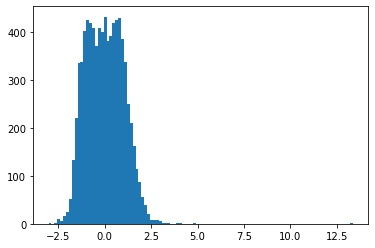

In [28]:
for i in range(19):
    plt.hist(X_flares.to_numpy()[:,i], bins='auto') 
    plt.show()

### Show covariates' correlations

In [70]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')

    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 


def corrplot(data, size_scale=500, marker='s'):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=256),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale
    )
    
    
def sort_corr_matrix(C):
    ndim = C.shape[0]
    inds_orig = list(range(ndim))
    inds = []
    
    for _ in range(ndim):
        inds.append(inds_orig[(len(inds_orig)-1)//2])
        del inds_orig[(len(inds_orig)-1)//2]
    
    inds = np.array(inds)

    corr_order = C.argsort()[::-1][0]

    C_sorted = np.empty_like(C)
    C_sorted[np.ix_(inds,inds)] = C[np.ix_(corr_order,corr_order)]
    
    return C_sorted, corr_order

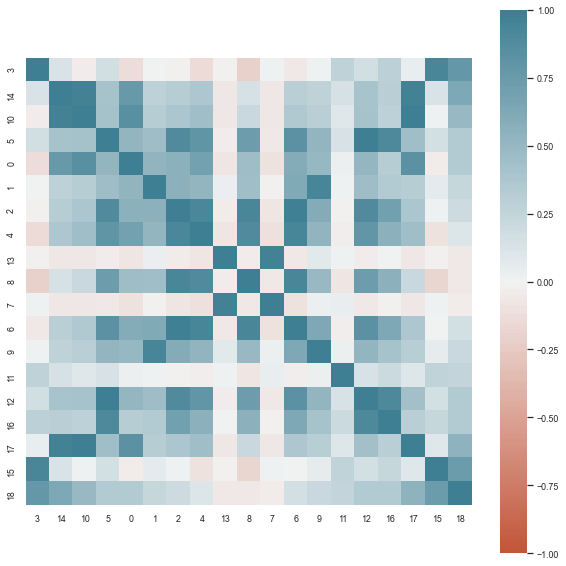

In [71]:
corr, order = sort_corr_matrix(X_flares.corr().to_numpy())


plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    order,
);
ax.set_yticklabels(
    order,
);

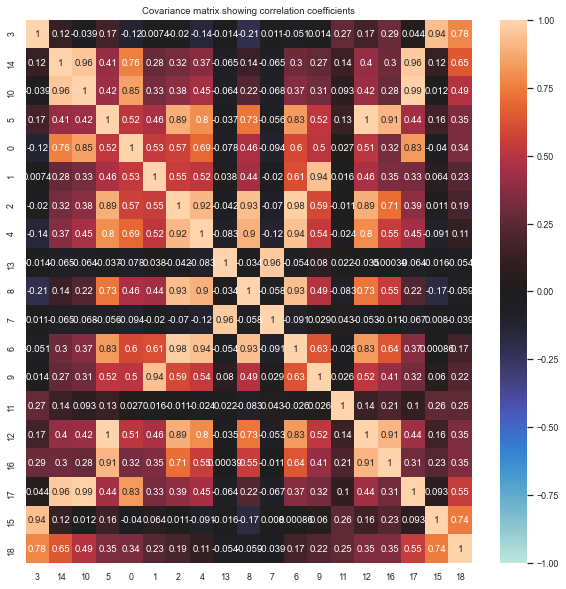

In [72]:
plt.figure(figsize=(10,10))
sn.set(font_scale=0.8)
sn.heatmap( corr, annot = True, vmin=-1, vmax=1, center= 0, xticklabels=order, yticklabels=order)
plt.title('Covariance matrix showing correlation coefficients')
plt.show()

### Plot 2D PCA projection

Text(0, 0.5, 'component 2')

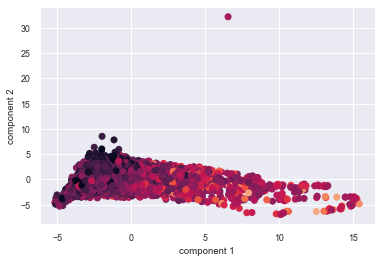

In [80]:
pca = PCA(n_components=3)
projected = pca.fit_transform(X_flares)

plt.scatter(projected[:, 0], projected[:, 1], c = y_flares['log_intensity'].to_list())
plt.xlabel('component 1')
plt.ylabel('component 2')

### Plot 3D PCA projection

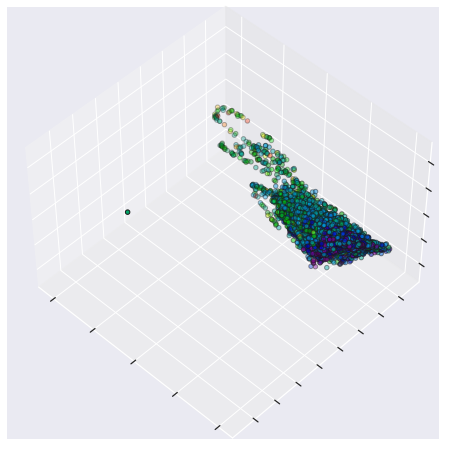

In [82]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(10, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

ax.scatter(projected[:, 0], projected[:, 1], projected[:, 2], c = y_flares['log_intensity'], 
           cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

# Basic Regression models

### Create train and test set

In [83]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_flares, y_flares, test_size=0.2, random_state=42)

In [85]:
# Category distribution in trains set and test set
print(y_train.groupby('category')['log_intensity'].nunique())
print(y_test.groupby('category')['log_intensity'].nunique())

category
A     3
B    90
C    90
M    62
X    16
Name: log_intensity, dtype: int64
category
B    90
C    84
M    38
X     7
Name: log_intensity, dtype: int64


In [91]:
y_train = y_train['log_intensity']
y_test = y_test['log_intensity']

## Linear Regression

In [96]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [97]:
y_lr_pred = lr.predict(X_test)
print("Linear Regression Root Mean Squared Error is: {}.".format(np.sqrt(mse(y_test, y_lr_pred))))

Linear Regression Root Mean Squared Error is: 1.059335840908454.


## LASSO

In [98]:
lasso = linear_model.Lasso(alpha= 1)
lasso.fit(X_train, y_train)

Lasso(alpha=1)

In [100]:
y_la_pred = lasso.predict(X_test)
print("LASSO Root Mean Squared Error is: {}.".format(np.sqrt(mse(y_test, y_la_pred))))

LASSO Root Mean Squared Error is: 1.2564012434194844.


## Ridge Regression

In [101]:
ridge = linear_model.Ridge(alpha= 1)
ridge.fit(X_train, y_train)

Ridge(alpha=1)

In [102]:
y_rid_pred = ridge.predict(X_test)
print("Ridge Regression Root Mean Squared Error is: {}.".format(np.sqrt(mse(y_test, y_rid_pred))))

Ridge Regression Root Mean Squared Error is: 1.0594314658732678.


## Random Forest Regressor

In [104]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators = 1000, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [105]:
y_rf_pred = regr.predict(X_test)
print("RF Regress Root Mean Squared Error is: {}.".format(np.sqrt(mse(y_test, y_rf_pred))))

RF Regress Root Mean Squared Error is: 0.9758463885330303.
